# Libraries

In [1]:
import os 
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For K-means clustering

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

# For random forest


# For CNN

# import torch
# import torch.nn as nn
# import torch.nn.functional as F 
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader

# # For classification and testing accuracy

    
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

# Data

In [2]:
# dirname = '/Users/shauntan2/Documents/Imperial College/Term 2/Machine Learning/ML_Project/data/Kather_texture_2016_image_tiles_5000/01_TUMOR'
folderpath = '../Kather_texture_2016_image_tiles_5000'
final = []
for i in os.listdir(folderpath):
    if not i.startswith('.'): # To ignore hidden files
        print(i)
        for fname in os.listdir(os.path.join(folderpath, i)):
            im = Image.open(os.path.join(folderpath, i, fname))
            imarray = np.array(im)
            final.append(imarray)

final = np.asarray(final)
final

05_DEBRIS
06_MUCOSA
03_COMPLEX
07_ADIPOSE
01_TUMOR
04_LYMPHO
08_EMPTY
02_STROMA


array([[[[140,  63, 103],
         [181,  87, 123],
         [195, 101, 137],
         ...,
         [231, 174, 193],
         [231, 174, 193],
         [232, 168, 190]],

        [[172,  91, 132],
         [194,  96, 129],
         [196,  98, 131],
         ...,
         [226, 160, 182],
         [230, 164, 186],
         [234, 164, 188]],

        [[222, 114, 146],
         [202,  93, 130],
         [200,  91, 128],
         ...,
         [225, 166, 186],
         [233, 174, 194],
         [242, 175, 200]],

        ...,

        [[218, 162, 185],
         [213, 101, 149],
         [195,  83, 131],
         ...,
         [190,  79, 106],
         [184,  73, 100],
         [178,  65,  95]],

        [[200, 142, 166],
         [207,  92, 141],
         [194,  79, 128],
         ...,
         [181,  68,  96],
         [178,  65,  93],
         [176,  63,  93]],

        [[211, 125, 162],
         [187,  91, 128],
         [182,  86, 123],
         ...,
         [193,  64, 102],
        

In [3]:
final.shape # Checking the number of arrays and shape, should be 5000, 150px x 150px

(5000, 150, 150, 3)

In [4]:
print(final.min())

0


In [5]:
print(final.max())

255


In [22]:
# To save the images data as arrays as a separate file
# np.save('/Users/shauntan2/Documents/Imperial College/Term 2/Machine Learning/ML_Project/data/crc_images_array', final)

# Unsupervised Method: K-Means Clustering

In [4]:
# Reshape data for clustering
# Clustering of images require it to be 2D arrays
final_clustering = np.reshape(final, (final.shape[0], -1))
final_clustering.shape

(5000, 67500)

In [5]:
# Data Normalisation
final_clustering_standard = StandardScaler().fit_transform(final_clustering)

Text(0.5, 1.0, 'Clustering of CRC images data')

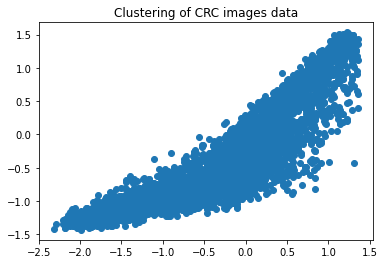

In [6]:
# Plotting the data from the images array data
plt.scatter(final_clustering_standard[:, 0], final_clustering_standard[:, 1])
plt.title("Clustering of CRC images data")

KeyboardInterrupt: 

In [ ]:
## Check which number of clusters works best 
n_cluster_list = [4,5,6,7,8,9,10,11,15,20] # there can't be more clusters as n

elbow = []
ss = []
for n_clusters in n_cluster_list:
   #iterating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(final_clustering_standard)
    #Finding the average silhouette score
    silhouette_avg = metrics.silhouette_score(final_clustering_standard, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    #Finding the average SSE"
    elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

In [ ]:
# Plotting silhouette score and elbow method
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(n_cluster_list, elbow,'bx-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(n_cluster_list, ss,'bx-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()
plt.savefig('silhouette_score_elbow.pdf')

In [ ]:
# Using a cluster of 8
kmeans = KMeans(n_clusters = 8, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(final_clustering_standard)
print('Done')

In [ ]:
# Plotting the results after clustering
 
#plotting the results:

u_labels = np.unique(y_kmeans)

for i in u_labels:
    plt.scatter(final_clustering_standard[y_kmeans == i , 0] , final_clustering_standard[y_kmeans == i , 1] , label = i)

# Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of colorectal cancer images')
plt.show()
plt.savefig('clustering_crc.pdf')

# Supervised Method: Random Forest

# Supervised Method: Convolutional Neural Network